<a href="https://colab.research.google.com/github/amirmohammadkalateh/Mental_Health_Lifestyle/blob/main/rep_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, Model

# Load and preprocess data
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

# Encode categorical variables
categorical_cols = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Prepare features and target
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model using Functional API
inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
print("Training the model...")
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Calculate R-squared
y_pred = model.predict(X_test_scaled)
ss_res = np.sum((y_test - y_pred.flatten()) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'R-squared Score: {r2:.4f}')

Training the model...
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 26.0941 - mae: 4.3999 - val_loss: 7.8942 - val_mae: 2.3960
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.4607 - mae: 2.3110 - val_loss: 7.2689 - val_mae: 2.3218
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.8640 - mae: 2.2175 - val_loss: 7.1590 - val_mae: 2.3081
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8679 - mae: 2.2292 - val_loss: 7.1101 - val_mae: 2.3024
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9469 - mae: 2.2415 - val_loss: 7.0943 - val_mae: 2.3022
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9978 - mae: 2.2559 - val_loss: 7.0785 - val_mae: 2.2993
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8247 - mae: 2.2381 - val_loss: 7.0523 - val_mae: 2.2974
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3703 - mae: 2.1482 - val_loss: 7.0490 - val_mae: 2.2985
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess data
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

# Encode categorical variables
categorical_cols = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Prepare features and target
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build improved model using Functional API
inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
outputs = layers.Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile model with learning rate scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Train model
print("Training the model...")
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=200,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Calculate R-squared
y_pred = model.predict(X_test_scaled)
ss_res = np.sum((y_test - y_pred.flatten()) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'R-squared Score: {r2:.4f}')

Training the model...
Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 22.3109 - mae: 3.8334 - val_loss: 8.9966 - val_mae: 2.3474
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8756 - mae: 2.2825 - val_loss: 8.6112 - val_mae: 2.3107
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0445 - mae: 2.3525 - val_loss: 8.5238 - val_mae: 2.3124
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6266 - mae: 2.2807 - val_loss: 8.4161 - val_mae: 2.3073
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6047 - mae: 2.2950 - val_loss: 8.3364 - val_mae: 2.3134
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9654 - mae: 2.1979 - val_loss: 8.2580 - val_mae: 2.3075
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0293 - mae: 2.2174 - val_loss: 8.2289 - val_mae: 2.3083
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0343 - mae: 2.2474 - val_loss: 8.0831 - val_mae: 2.2967
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

# Feature engineering
df['Sleep_Quality'] = np.where(df['Sleep Hours'] < 6, 0,
                              np.where(df['Sleep Hours'] < 8, 1, 2))
df['Work_Life_Balance'] = np.where(df['Work Hours per Week'] > 50, 0,
                                  np.where(df['Work Hours per Week'] > 40, 1, 2))
df['Screen_Time_Risk'] = np.where(df['Screen Time per Day (Hours)'] > 6, 0,
                                 np.where(df['Screen Time per Day (Hours)'] > 4, 1, 2))

# Encode categorical variables
categorical_cols = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level',
                   'Mental Health Condition']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Prepare features and target
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Power transform target
pt = PowerTransformer()
y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1)).ravel()

# Build model
# Build model
def build_model(input_shape):
    # Wrap the input shape in a tuple if it's not already
    if not isinstance(input_shape, tuple):
        input_shape = (input_shape,)

    inputs = layers.Input(shape=input_shape)

    # First branch - Deep network
    x1 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.3)(x1)

    x1 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)

    x1 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1)
    x1 = layers.BatchNormalization()(x1)

    # Second branch - Skip connection
    x2 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x2 = layers.BatchNormalization()(x2)

    # Combine branches
    x = layers.Concatenate()([x1, x2])
    x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    outputs = layers.Dense(1)(x)

    return Model(inputs, outputs)

# Create and compile model
model = build_model(X_train_scaled.shape[1])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='huber', metrics=['mse'])

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6,
    mode='min'
)

# Train model
print("Training the model...")
history = model.fit(
    X_train_scaled,
    y_train_transformed,
    batch_size=32,
    epochs=300,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],  # Include ReduceLROnPlateau
    verbose=1
)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_transformed, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Make predictions and inverse transform
y_pred = model.predict(X_test_scaled)
y_pred = pt.inverse_transform(y_pred)
y_test_original = y_test.values.reshape(-1, 1)

# Calculate R-squared
ss_res = np.sum((y_test_original - y_pred) ** 2)
ss_tot = np.sum((y_test_original - np.mean(y_test_original)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'R-squared Score: {r2:.4f}')


Training the model...
Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.9687 - mse: 1.5930 - val_loss: 0.8488 - val_mse: 1.0908 - learning_rate: 0.0010
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8409 - mse: 1.1423 - val_loss: 0.8414 - val_mse: 1.0908 - learning_rate: 0.0010
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7826 - mse: 1.0054 - val_loss: 0.8401 - val_mse: 1.1104 - learning_rate: 0.0010
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7746 - mse: 0.9927 - val_loss: 0.8347 - val_mse: 1.1208 - learning_rate: 0.0010
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7350 - mse: 0.9093 - val_loss: 0.8315 - val_mse: 1.1406 - learning_rate: 0.0010
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7315 - mse: 0.9148 - val_loss: 0.8345 - val_mse: 1.1760 - learning_rate: 0.0010
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7211 - mse: 0.9096 - val_loss: 0.8318 - val_mse: 1.1977 - learning_r

Training the model...
Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 1.0712 - mae: 1.1299 - val_loss: 0.8442 - val_mae: 0.9023 - learning_rate: 0.0010
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8587 - mae: 0.9104 - val_loss: 0.8365 - val_mae: 0.9013 - learning_rate: 0.0010
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8093 - mae: 0.8640 - val_loss: 0.8290 - val_mae: 0.9004 - learning_rate: 0.0010
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7632 - mae: 0.8103 - val_loss: 0.8289 - val_mae: 0.9075 - learning_rate: 0.0010
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7489 - mae: 0.8025 - val_loss: 0.8312 - val_mae: 0.9230 - learning_rate: 0.0010
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7380 - mae: 0.8037 - val_loss: 0.8213 - val_mae: 0.9146 - learning_rate: 0.0010
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7153 - mae: 0.7805 - val_loss: 0.8205 - val_mae: 0.9201 - learning_rat

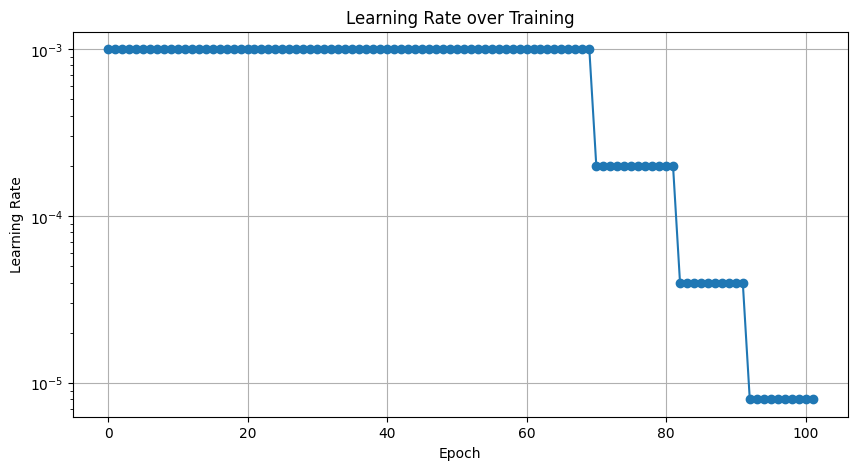

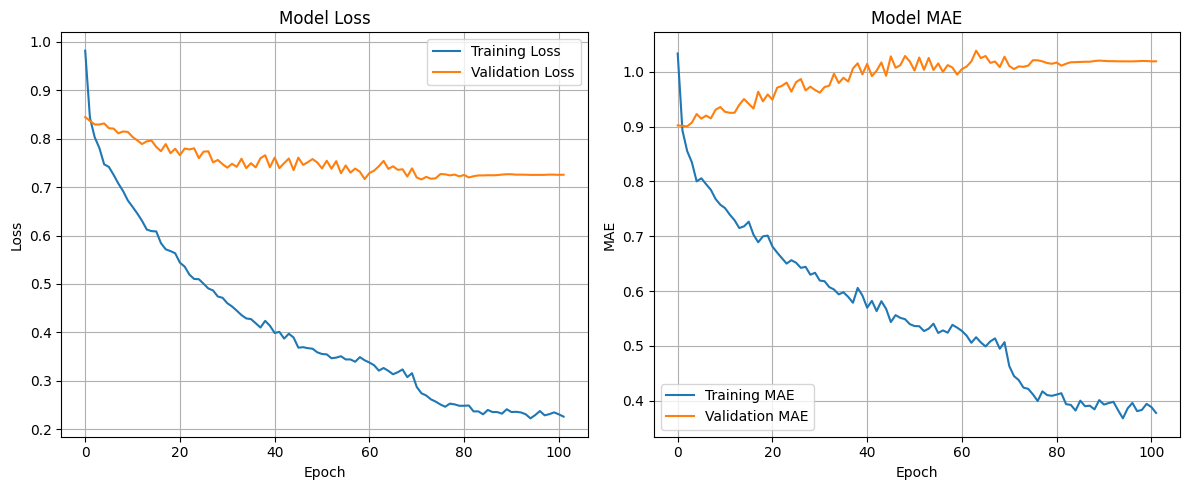

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
df = pd.read_csv('Mental_Health_Lifestyle_Dataset.csv')

# Feature engineering
df['Sleep_Quality'] = np.where(df['Sleep Hours'] < 6, 0,
                              np.where(df['Sleep Hours'] < 8, 1, 2))
df['Work_Life_Balance'] = np.where(df['Work Hours per Week'] > 50, 0,
                                  np.where(df['Work Hours per Week'] > 40, 1, 2))
df['Screen_Time_Risk'] = np.where(df['Screen Time per Day (Hours)'] > 6, 0,
                                 np.where(df['Screen Time per Day (Hours)'] > 4, 1, 2))

# Encode categorical variables
categorical_cols = ['Country', 'Gender', 'Exercise Level', 'Diet Type', 'Stress Level',
                   'Mental Health Condition']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Prepare features and target
X = df.drop(['Happiness Score'], axis=1)
y = df['Happiness Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Power transform target
pt = PowerTransformer()
y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1)).ravel()

# Build model
def build_model(input_shape):
    inputs = layers.Input(shape=(input_shape,))

    # First branch - Deep network
    x1 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.3)(x1)

    x1 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Dropout(0.2)(x1)

    x1 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1)
    x1 = layers.BatchNormalization()(x1)

    # Second branch - Skip connection
    x2 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(inputs)
    x2 = layers.BatchNormalization()(x2)

    # Combine branches
    x = layers.Concatenate()([x1, x2])
    x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    outputs = layers.Dense(1)(x)

    return Model(inputs, outputs)

# Create and compile model
model = build_model(X_train_scaled.shape[1])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='huber', metrics=['mae'])

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    mode='min'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6,
    mode='min'
)

# Custom callback to track learning rate
class LRHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.lrs = []

    def on_epoch_begin(self, epoch, logs=None):
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        self.lrs.append(lr)

    def on_train_end(self, logs=None):
        self.model.history.history['lr'] = self.lrs

lr_history = LRHistory()

# Train model
print("Training the model...")
history = model.fit(
    X_train_scaled,
    y_train_transformed,
    batch_size=32,
    epochs=300,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr, lr_history],
    verbose=1
)

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_transformed, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

# Make predictions and inverse transform
y_pred = model.predict(X_test_scaled)
y_pred = pt.inverse_transform(y_pred)
y_test_original = y_test.values.reshape(-1, 1)

# Calculate R-squared
ss_res = np.sum((y_test_original - y_pred) ** 2)
ss_tot = np.sum((y_test_original - np.mean(y_test_original)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f'R-squared Score: {r2:.4f}')

# Visualize learning rate changes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['lr'], marker='o')
plt.title('Learning Rate over Training')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.yscale('log')
plt.grid(True)
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()